# Exploratory Data Analysis of HEP data
*****

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data
***
- Data is obtained from: https://www.openml.org/d/23512
- Each event is represented by a set of 28 features, including 21 low-level features corresponding to physics properties measured by the detector, and 7 high-level features derived from the previous ones.
- Some of the event's features:

|Type| Variable  | Description   |
|---| --- | --- |
|low-level|lepton pT |  Momentum of the lepton|
|low-level|lepton eta | Pseudorapidity eta of the lepton|
|low-level|lepton phi | Azimuthal angle phi of the lepton|
|low-level|Missing energy magnitude | Energy not detected|
|| ... | ...|
|high-level|m_jlv| Mass jet ($j$), lepton ($l$, electrons or muons), neutrino $\nu$| 
|high-level|m_bb| Mass quarks $b$|	
|high-level|m_wbb| Mass boson $W$ and quarks $b$|
|high-level|m_wwbb|Mass bosons $W$ and quarks $b$|



- More detailes in Baldi, P., Sadowski, P., & Whiteson, D. (2014). Searching for exotic particles in high-energy physics with deep learning. Nature communications, 5(1), 1-9 [(link)](https://www.nature.com/articles/ncomms5308).
- **Problem:** Binary classification of HEP events, to indentify signal from background.
 - signal: $gg \rightarrow H^0 \rightarrow W^{\mp} H^{\pm} \rightarrow W^{\mp} W^{\pm} h^0 \rightarrow W^{\mp} W^{\pm} b \bar{b}$. 
 This signal process is the fusion of two gluons into a heavy electrically neutral Higgs boson ($gg \rightarrow H^0 $), which decays to a heavy electrically-charged Higgs bosons ($H^{\pm}$) and a $W$ boson. The $H^{\pm}$ boson subsequently decays to a second $W$ boson and the light Higgs boson, $h^0$. The light Higgs boson decays predominantly to a pair of bottom quarks, giving the process.

In [2]:
# Read data file
df = pd.read_csv("../data/higgs/phpZLgL9q.csv")
df.rename(columns = {'class': 'label'}, inplace = True)
# Removing last row containinng "?" values
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df = df.apply(pd.to_numeric)
# Pandas dataframe for correlation matrix without label column
df_corr = df.drop('label', inplace=False, axis=1)

/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df

label  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          1   0.907542    0.329147    0.359412                  1.497970   
1          1   0.798835    1.470639   -1.635975                  0.453773   
2          0   1.344385   -0.876626    0.935913                  1.992050   
3          1   1.105009    0.321356    1.522401                  0.882808   
4          0   1.595839   -0.607811    0.007075                  1.818450   
...      ...        ...         ...         ...                       ...   
98044      0   2.786130   -0.679884   -1.673151                  0.854033   
98045      1   0.908091   -0.825006   -0.830871                  0.736298   
98046      0   2.512898    0.530759   -1.470626                  1.641798   
98047      0   0.903699    0.261943   -0.429149                  1.892855   
98048      0   0.566047   -0.317568    0.062561                  0.358186   

       missing_energy_phi    jet1pt   jet1eta   jet1phi  jet1b-tag  ...  \
0               -0.313010  1.095531 -0.557525 -1.588230   2.173076  ...   
1                0.425629  1.104875  1.282322  1.381664   0.000000  ...   
2                0.882454  1.786066 -1.646778 -0.942383   0.000000  ...   
3               -1.205349  0.681466 -1.070464 -0.921871   0.000000  ...   
4               -0.111906  0.847550 -0.566437  1.581239   2.173076  ...   
...                   ...       ...       ...       ...        ...  ...   
98044            1.020573  0.844252 -0.323831 -0.132437   0.000000  ...   
98045            1.512713  0.881811 -0.363440  0.006813   1.086538  ...   
98046            1.613386  0.934027  1.521958 -0.049836   0.000000  ...   
98047            0.313687  0.493396 -1.494282 -1.458506   0.000000  ...   
98048           -1.315823  0.691176  1.154583 -0.242759   2.173076  ...   

        jet4eta   jet4phi  jet4b-tag      m_jj     m_jjj      m_lv     m_jlv  \
0     -1.138930 -0.000819   0.000000  0.302220  0.833048  0.985700  0.978098   
1      1.128848  0.900461   0.000000  0.909753  1.108330  0.985692  0.951331   
2     -0.678379 -1.360356   0.000000  0.946652  1.028704  0.998656  0.728281   
3     -0.373566  0.113041   0.000000  0.755856  1.361057  0.986610  0.838085   
4     -0.654227 -1.274345   3.101961  0.823761  0.938191  0.971758  0.789176   
...         ...       ...        ...       ...       ...       ...       ...   
98044 -0.807466  1.054172   0.000000  0.931880  0.880436  1.399047  1.041965   
98045 -0.187013  0.716785   0.000000  1.317681  1.010795  0.985962  0.957878   
98046  0.053673 -0.386483   0.000000  0.774413  0.745263  0.997088  1.392387   
98047 -0.283621  1.110772   3.101961  0.527038  0.607263  1.125286  0.634106   
98048 -0.844943 -0.294922   0.000000  0.747239  1.008975  0.989497  1.203147   

           m_bb     m_wbb    m_wwbb  
0      0.779732  0.992356  0.798343  
1      0.803252  0.865924  0.780118  
2      0.869200  1.026736  0.957904  
3      1.133295  0.872245  0.808487  
4      0.430553  0.961357  0.957818  
...         ...       ...       ...  
98044  0.875924  1.056742  1.383591  
98045  1.454672  0.903937  0.786069  
98046  0.864681  1.179783  1.086167  
98047  0.115543  0.425828  0.692506  
98048  0.892492  1.090807  0.888965  

[98049 rows x 29 columns]

## Correlation matrix
*****

Text(0.5, 1.0, 'Correlation Heatmap')

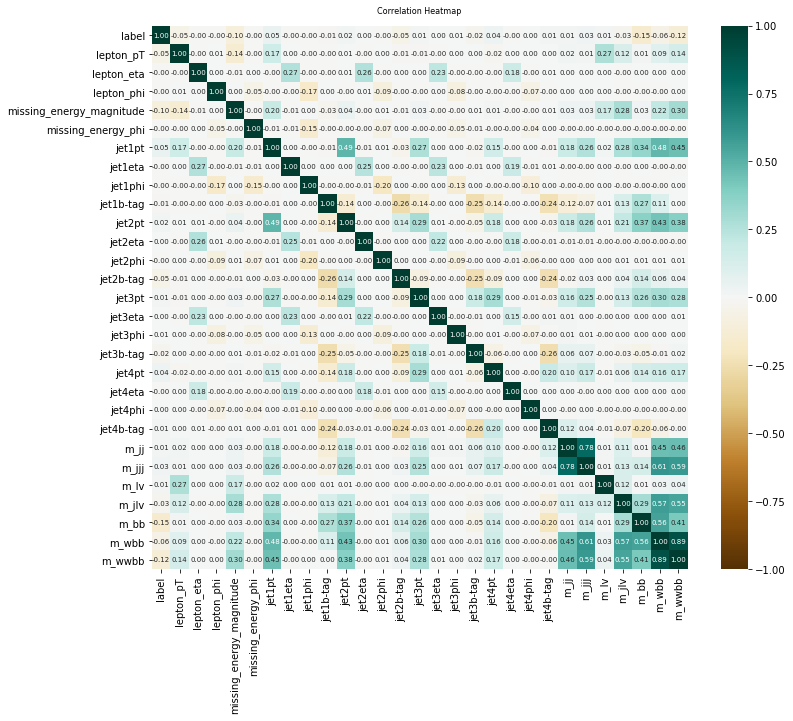

In [3]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

In [4]:
df.columns

Index(['label', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet1pt', 'jet1eta',
       'jet1phi', 'jet1b-tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag',
       'jet3pt', 'jet3eta', 'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta',
       'jet4phi', 'jet4b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb',
       'm_wbb', 'm_wwbb'],
      dtype='object')

## Features histogram 
*****
- Simple histogramas using hist() method of dataframe

<Figure size 432x288 with 0 Axes>

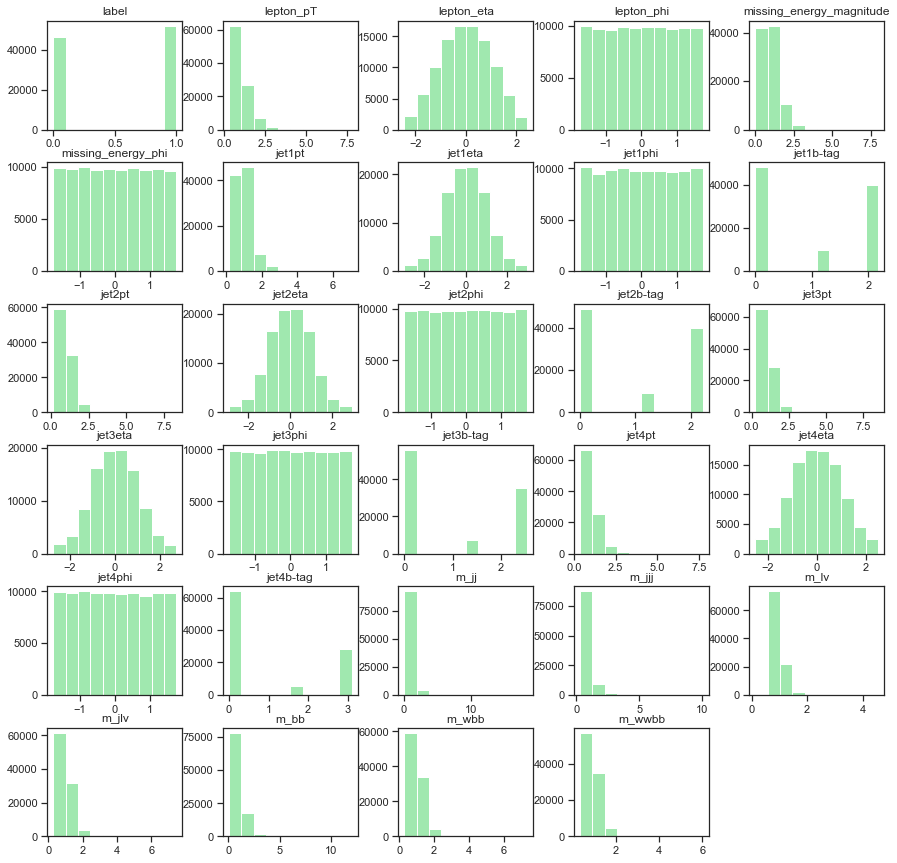

In [31]:
plt.figure()
df.hist(figsize=(15, 15),color='#A0E8AF',grid=False)
plt.show()



## Pair plots
*****

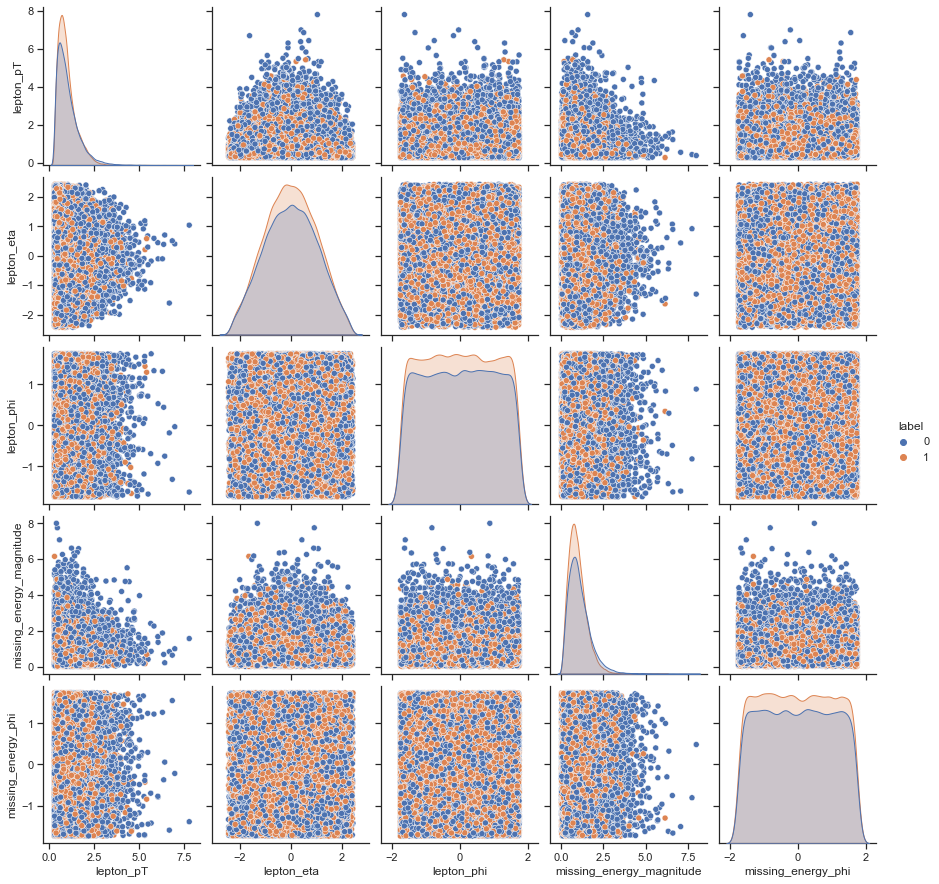

In [5]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = [ 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi'], hue="label")
plt.show()

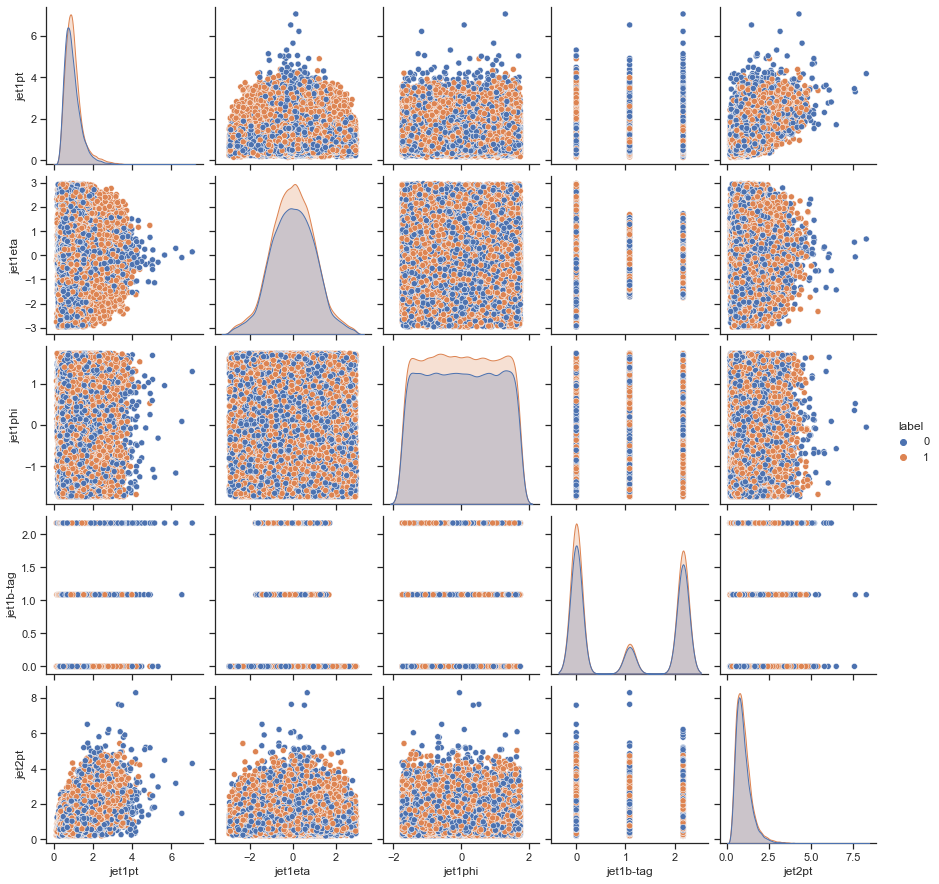

In [6]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = [ 'jet1pt', 'jet1eta','jet1phi', 'jet1b-tag', 'jet2pt'], hue="label")
plt.show()

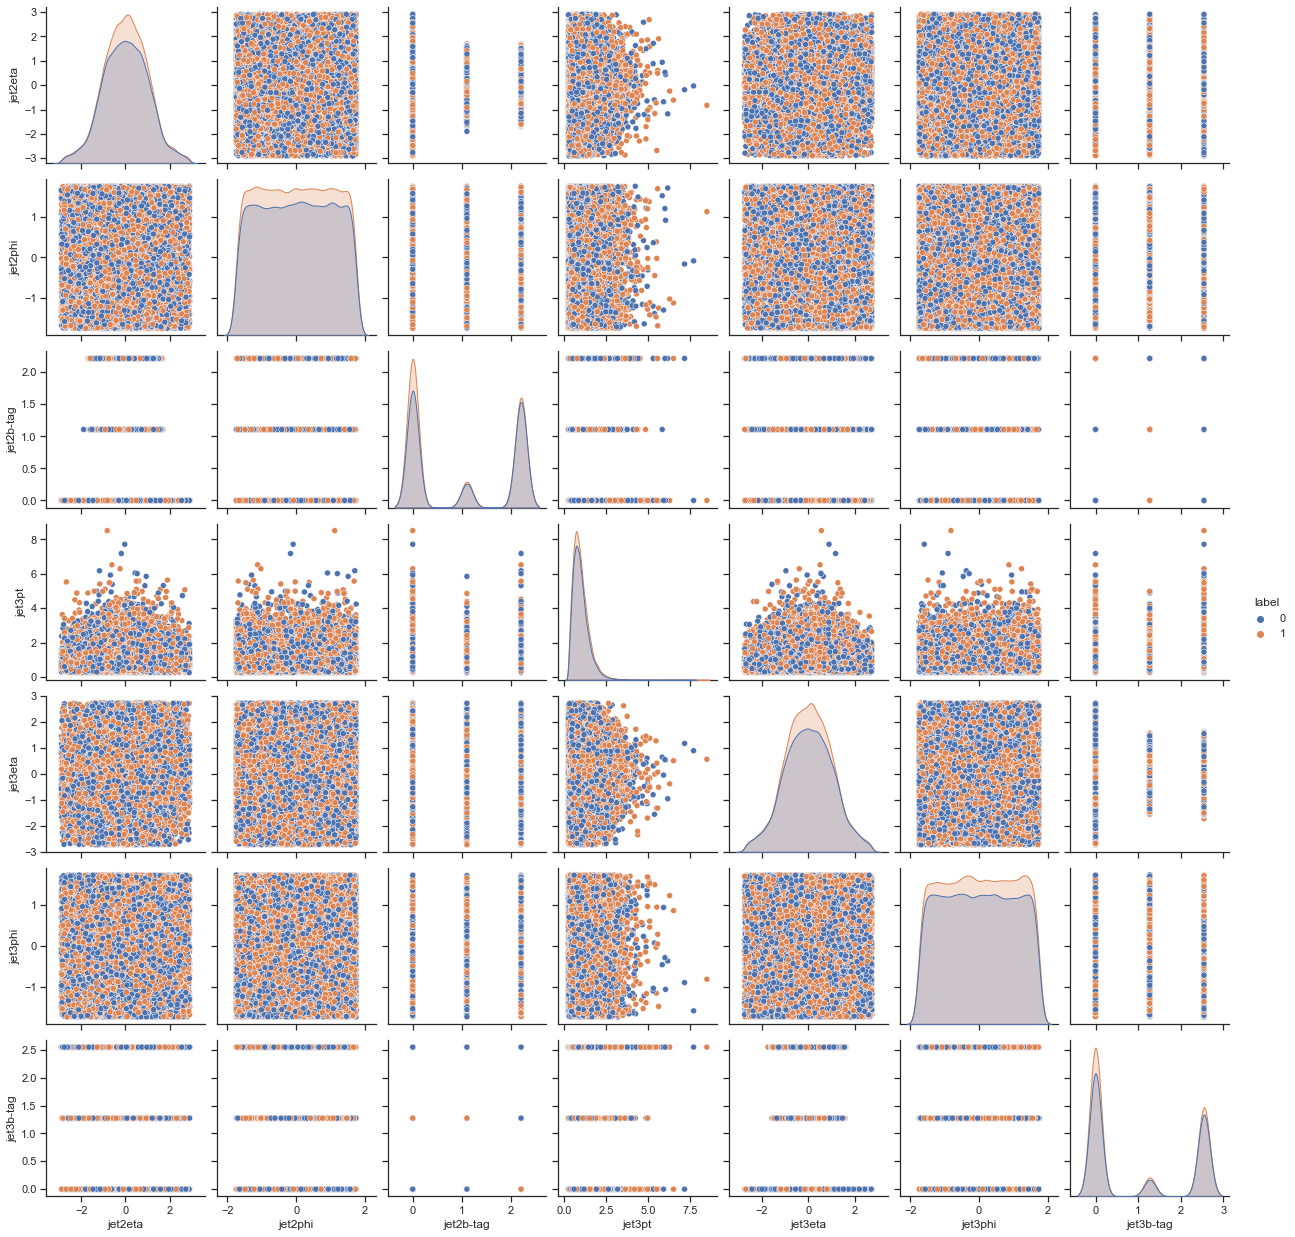

In [7]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = [ 'jet2eta', 'jet2phi', 'jet2b-tag','jet3pt', 'jet3eta', 'jet3phi', 'jet3b-tag'], hue="label")
plt.show()


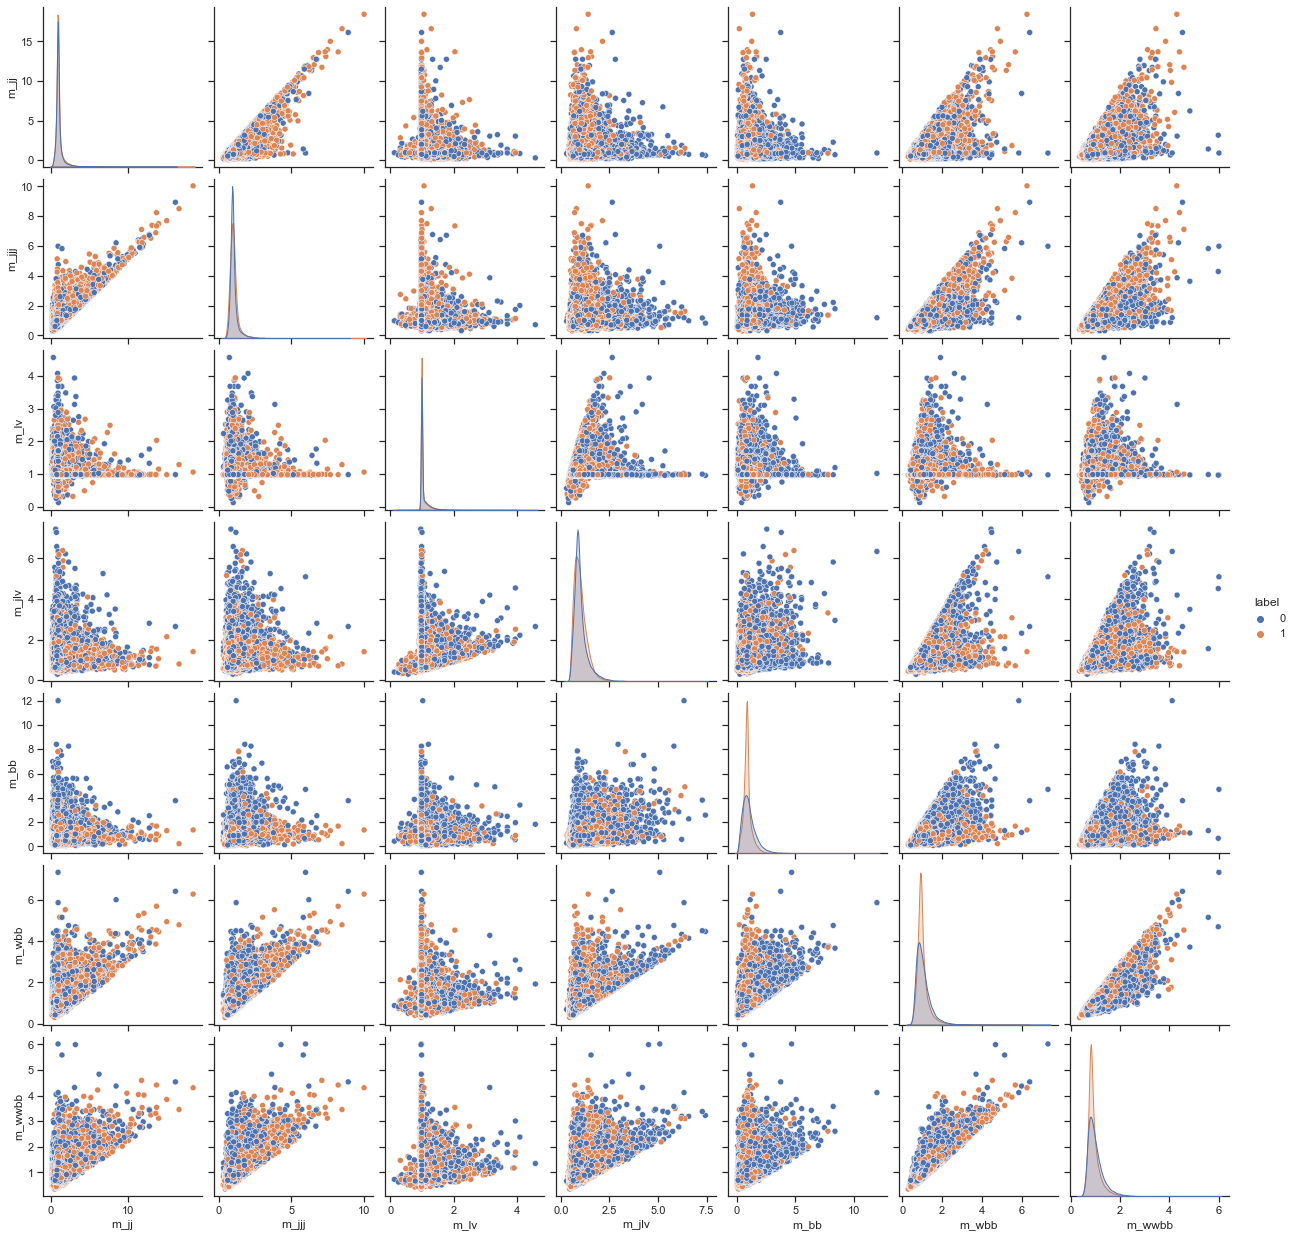

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = [ 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb',
       'm_wbb', 'm_wwbb'], hue="label")
plt.show()